<a href="https://colab.research.google.com/github/juanetoboneto/Que-Deudas-Valen-el-Esfuerzo-del-Banco/blob/main/Proyecto_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Proyecto I : "*Which Debts Are Worth the Bank's Effort?"*



#1. Descripción del Proyecto:
Después de que un banco haya declarado legalmente que una deuda es "incobrable", se considera que la cuenta está "cancelada".
Sin embargo, esto no significa que el banco no quiera recuperar, al menos, una parte de dicha deuda. Todavia buscan cobrar una parte del dinero que se les debe.

En este proyecto, se verá una situación en la que un banco asignó a los clientes morosos diferentes estrategias de recuperación en función del monto esperado que el banco creía que recuperaría del cliente, entre mayor sea el dinero que es posible recuperar, mayor sera la estrategia de recuperación.

También hay que tener en cuenta que el asignar una estrategia específica de recuperación en este caso llamada "estrategia de recuperación alta" a un cliente moroso tiene un costo para el banco; en especifico, entre mayor sea la estrategia de recuperación mas alto sera el coste de dicha estrategia.

#2. Objetivo del Proyecto:
El objetivo es determinar en esta asignación no aleatoria si la cantidad incremental (o también llamado ingreso incremental que es  la forma en la que el banco calcula los beneficios adicionales generados por la aplicación de una estrategia de recuperación alta) que gana el banco superó el costo adicional de asignar clientes a una estrategia de recuperación más alta.

#3. Los Paquetes que Usaremos:
Los paquetes que usaremos a lo largo de este proyecto son los siguientes:


*   **NumPy.** Este paquete es el que permite crear **DataFrames**, entendidos estos como matrices multidimencionales y permite realizar algunas operaciones básicas con estos, de los cuales, el que mas nos interesa es la capacidad de realizar algebra lineal, dandonos una funcionalidad parecida a **MatLab**. Lo necesitamos instalar pues es el paquete estructural y fundamental para los demás.
*   **Pandas.**  Este paquete está especializado en el análisis de datos y la ciencia de datos, proporciona varias herramientas para ello: Permite importar datos en formato **cvs.** a **DataFrames**, de los cuales permite realizar inspecciones de registros, separación, cortes, unión y concatenación de los mismos, clasificarlos y realizar resumenes. Para ello dispone de un gran grupo de funciones. Lo usaremos para estudiar los datos en forma de DataFrame y poder manipular este según nos sea de utilidad.
*   **Matplotlib.** Este paquete es esencialmente gráfico, que permite realizar gráficas apartir de  **DataFrames** mas específicamente objetos que se definen en **NumPy.** y que utilizaremos para realizar pruebas y exploración estadística parecida a **MatLab** y **R Proyect**.
*   **SciPy.** Biblioteca complementaria e integrada a **NumPy** que nos provee de algunas funcionalidades estadisticas, herramientas para test y regresiones.
*   **Seaborn.** Esta es una libreria basada en **Matplotlib** para la visualización de datos, provee una interfas de alto nivel para graficas estadisticas atractivas e informativas.

*   **Stats Models.** es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos.

 Notese que los paquetes que utilizaremos buscan traer características y ventajas de otros lenguajes como **R Proyect** o **MatLab** a **Python** lo que es prueba de la flexibilidad del último.



In [ ]:
import numpy as np
from numpy.lib.function_base import median
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
# Para el Estudio Grafico de Multiples Variables
import seaborn as sns
# Para el uso Estadistico Especifico
from scipy import stats
import statistics 
# Para el uso de Operaciones Especificas
import operator
# Para crear modelos Estadisticos
import statsmodels.api as sm

#4. Los Datos del Proyecto:
Para realizar este estudio dependeremos directamente de los datos proporcionados por el banco, acerca de $1883$ clientes morosos, estos datos, a su vez, se pueden dividir en $5$ clases para cada cliente:

*   **ID.**  Se trata sencillamente del número de identificación de cada cliente y para nuestro estudio, en particular, no nos será de especial utilidad.
*   **Expected Recovery Amount.** La cantidad de Unidades Monetarias (UM) que espera el banco recuperar de su respectivo cliente moroso, dicha cantidad es total e independiente para cada cliente.
*   **Actual Recovery Amount.**  La cantidad de Unidades Monetarias (UM) que pudo recuperar el banco *de facto* de los clientes morosos, la cantidad real que se recupero, tambien es total y es independiente para cada cliente.
*   **Recovery Strategy.** Este es el dato mas importante para nuestra investigación. La estrategia de recuperación es el dato de cuántas Unidades Monetarias destina el banco para asegurar la recuperación, entre mayor sea el monto que se espera mayores serán los esfuerzos del banco para recuperarlo; parte de un monto mínimo **Nivel $0$** y cada nivel va aumentando la inversión en $50$ Unidades Monetarias, hasta tener el **Nivel $4$** desde el **Nivel $0$**.
*   **Age.** La edad de los clientes, con este dato podríamos realizar un **Contraste No Paramétrico**.
*   **Sex.** El sexo de los clientes, con este dato debemos realizar un testeo estadístico. 





In [ ]:
url="https://raw.githubusercontent.com/juanetoboneto/Que-Deudas-Valen-el-Esfuerzo-del-Banco/main/DatosBanco.csv"
Datos=pd.read_csv(url)

print(Datos)
print("El Tamaño de la Data:",Datos.size)
print("Propiedades de la Data:",Datos.describe)

        id  monto_de_recuperacion_esperado  monto_de_recuperacion_real  \
0     2030                             194                  263.540000   
1     1150                             486                  416.090000   
2      380                             527                  429.350000   
3     1838                             536                  296.990000   
4     1995                             541                  346.385000   
...    ...                             ...                         ...   
1877   361                            9785                15388.195990   
1878   196                            9857                 9709.909257   
1879   313                            9859                30209.181790   
1880  1781                            9920                20386.232190   
1881   522                            9964                16706.305920   

     estrategia_de_recuperacion  edad       sexo  
0       Nivel 0 de Recuperacion    19  Masculino  
1       N

#5. Desarrollo del proyecto:


##5.1. Estadistica Descriptiva de Variable Unidimensional:



1. **Resumen de Estadistica Descriptiva en Una Variable:**
En nuestro proyecto particular deberemos hacer un estudio, primero, de cada variable presente en los datos; para esto nos sera util primero describir que tipos de variable se pueden presentar en la estadistica descriptiva (según *Introductory Statistics, Prem S. Mann; Christoper Jay Lacke*):

*   **Las Variables Cuantitativas:** Estas son variables que pueden ser medidas numericamente, se dividen en continuas (medidas por numeros reales) y discretas (medidas por numeros enteros).
*   **Las Variables Cualitativas:** Tambien llamadas Categoricas, son el tipo de variables que, apesar de no poder asumir valores numericos, pueden ser clasificadas en 2 o mas categorias no numericas.

Para nuestro analisis necesitamos conocer las distintas clases de objetos que estaran presentes en nuestra Data, y como son entendidos tannto por el programa que usamos como por los diferentes modulos:


**Tipos de Clasificacion en Python Pandas:** Al ser nuestro compilador de data, para clasificar utilizaremos la funcionalidad de Pandas, para estos tipos se diferencian los elementos de 32 ó 64 Bits, si son diferentes no se podran operar entre si.
*   **int:** para los enteros.
*   **float:** para los reales.
*   **datetime:**, para los datos que clasifican en el tiempo.
*   **category:** especificamente para las variables cualitativas.
*   **object:** se usa para secuencias que pueden ser de numeros y caracteres.

Para identificar cual es el tipo de cada variable de nustros datos a la vez podremos usar el siguiente comando:

In [ ]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1882 non-null   int64  
 1   monto_de_recuperacion_esperado  1882 non-null   int64  
 2   monto_de_recuperacion_real      1882 non-null   float64
 3   estrategia_de_recuperacion      1882 non-null   object 
 4   edad                            1882 non-null   int64  
 5   sexo                            1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


Gracias a esta función podemos ver el tipo de cada una de nuestras variables. Con esto en mente podremos obtener a partir de las *Variables Cuantitativas* 
Estas van desde Medidas de Tendencia Central (Que buscan obtener un dato que represente el conjunto de los datos) como el promedio, pasando por Medidas de Dispercion como la desviacion estandar (Que determina que tan dispersos estan los datos con respecto al promedio), hasta Medidas de Posicion (Por la naturaleza de los datos que poseemos) de Datos ]Agruados, tales como los Cuartiles.

De estos datos el comando `XX.describe()` nos dara varias de esas medidas:


*   **count:** Es la cantidad de datos de dicha variable 
*   **mean:** Tambien llamada media aritmetica o promedio, medida de Tendencia Central única, es un valor que representa el comportamiento de los datos. 
*    **std:** Es un valor que verifica qué tan agrupados o separados están los datos.
* **min:** Es el mínimo valor que hay en los datos.
* **cuartiles:** son los valores de la distribución que la dividen en cuatro partes iguales, en intervalos que comprenden el mismo número de valores en este caso un *25%, 50%,75%*.
* **max:** Representa el valor maximo en la lista que tomo dicha variable, y coincide con el percentil del *100%*.

In [ ]:
Datos.describe()

,id,monto_de_recuperacion_esperado,monto_de_recuperacion_real,edad
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


Con esto en mente pasemos a ver cada variable en particular:

###5.1.1. Estadistica Descriptiva de la Variable Monto de Recuperacion Esperado:
Para poder hacer un estudio estadistico descriptivo de esta variable, notese que esta es de tipo `int64` con lo cual de dicha variable es de tipo Cuantitativa Discreta y podremos realizar las medidas de Tendencia, Dispersion y Posicion de `XX.describe()`; Sin embargo, esta información puede parecer insuficiente, en ese caso podremos tomar otras medidas:

In [ ]:
# Mediana (Medida de Tendencia Central)
mediana_MRE = median(Datos.monto_de_recuperacion_esperado)
print(mediana_MRE)

2062.0


In [ ]:
# Moda (Medida de Tendencia Central):
moda_MRE = sci.stats.mode(Datos.monto_de_recuperacion_esperado)
print(moda_MRE)

ModeResult(mode=array([1386]), count=array([5]))


La moda de este conjunto de datos numéricos es el valor que más se repite, es decir, el que tiene el mayor número de frecuencias absolutas. En este caso el valor que más se repite es 1386 con 5 apariciones.

Otras Medidas de Tendencia Central que nos pueden ser de utilidad, si por ejemplo, no nos sirve la Media Aritmetica, son los siguientes:

In [ ]:
# Centro de Amplitud:
centroA_MRE = (max(Datos.monto_de_recuperacion_esperado)+min(Datos.monto_de_recuperacion_esperado))/2 
print(centroA_MRE)

5079.0


Este es el valor que queda en medio de los valores mínimo y máximo.


Notese que no incluimos la *Media Ponderada* pues no poseemos informacion especifica sobre la importancia de cada cliente (Uno podria ser los **Niveles de la Estrategia de Recuperacion** pero en esta parte aun hablamos solo de *Variables Unidimensionales*). 

Tambien podremos tomar otras Medidas de Dispersion que nos den una idea de que tan representativos son los de Tendencia Central:  

In [ ]:
# Rango:
Rango_MRE = max(Datos.monto_de_recuperacion_esperado)-min(Datos.monto_de_recuperacion_esperado)
print(Rango_MRE)

9770


El rango de una distribución es la diferencia entre el valor máximo y el valor mínimo de la variable estadística. En este caso nuestra variable estadística es "monto_de_recuperacion_esperado", el cual tiene un rango de 9770. 

Otras Medidas de Posicion:

In [ ]:
# La Varianza:
Var_MRE = np.std(Datos.monto_de_recuperacion_esperado)**2
print(Var_MRE)

4077531.605219366


La varianza mide la mayor o menor dispersión de los valores de la variable respecto a la media aritmética. Cuanto mayor sea la varianza mayor dispersión existirá y por tanto, menor representatividad tendrá la media aritmética.

In [ ]:
# Coeficiente de Variacion:
CVar_MRE = np.std(Datos.monto_de_recuperacion_esperado)/np.mean(Datos.monto_de_recuperacion_esperado)*100
print(CVar_MRE,"%")

73.16353588681146 %


El coeficiente de variación de Pearson que se define como el cociente entre la desviación estándar y el valor absoluto de la media aritmética. Este coeficiente, representa el porcentaje que la desviación estándar contiene a la media aritmética y por lo tanto cuanto mayor es el coeficiente de variación mayor es la dispersión y menor la representatividad de la media. 

Ahora Bien, despues de obtener toda esta información estadistica, demos una pequeña visualización a través de una gráfica:

La siguiente se trata de la Grafica de Densidad de la variable Monto de Recuperación Esperado:

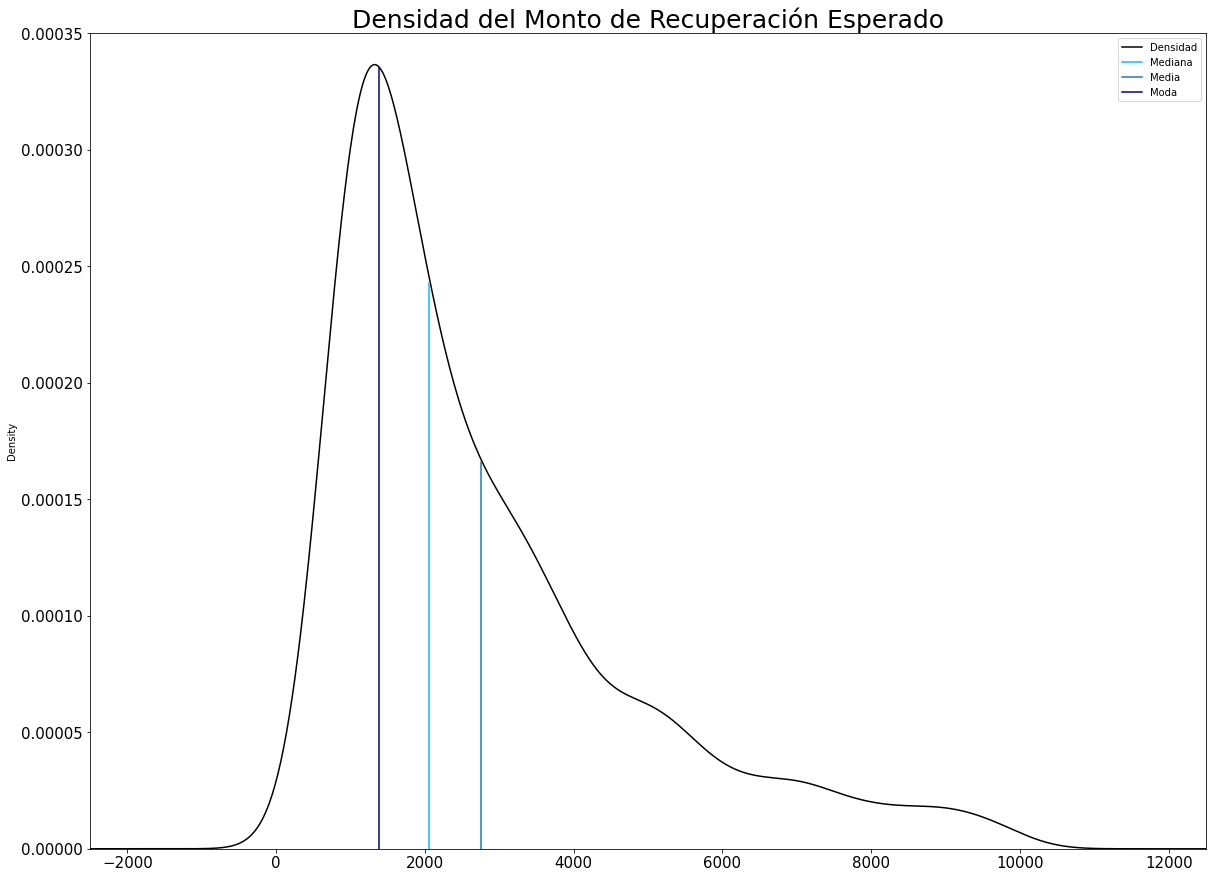

In [ ]:
Datos.monto_de_recuperacion_esperado.plot.density(color='black', figsize = (20,15), fontsize=15) 

#Mediana(Azul clarito)
x_1=[2062, 2062]
y_1=[0,0.000243]
l1= plt.plot(x_1,y_1, color="deepskyblue")

#Media(Azul detergente)
x_2=[2759.967588, 2759.967588]
y_2=[0,0.000166]
l2= plt.plot(x_2,y_2)

#Moda(Azul Oscuro)
x_3=[1386, 1386]
y_3=[0,0.000335]
plt.plot(x_3,y_3, color="navy") 

plt.xlim(-2500,12500)
plt.ylim(0,0.00035)
plt.legend(["Densidad","Mediana","Media","Moda"],loc="upper right") 
plt.rc('legend',fontsize=20)

plt.title("Densidad del Monto de Recuperación Esperado",fontsize=25)

plt.show()


De dicha gráfica, se puede inferir que el Banco, espera que la gran mayoria de montos que esperan recuperar estan entre 0 y 4000 Unidades Monetarias, apesar de ello tambien se puede ver que los montos superiores a estos no pueden ser ignorados.


Tambien podremos observar la Gráfica de Caja del Monto de Recuperación Esperado:

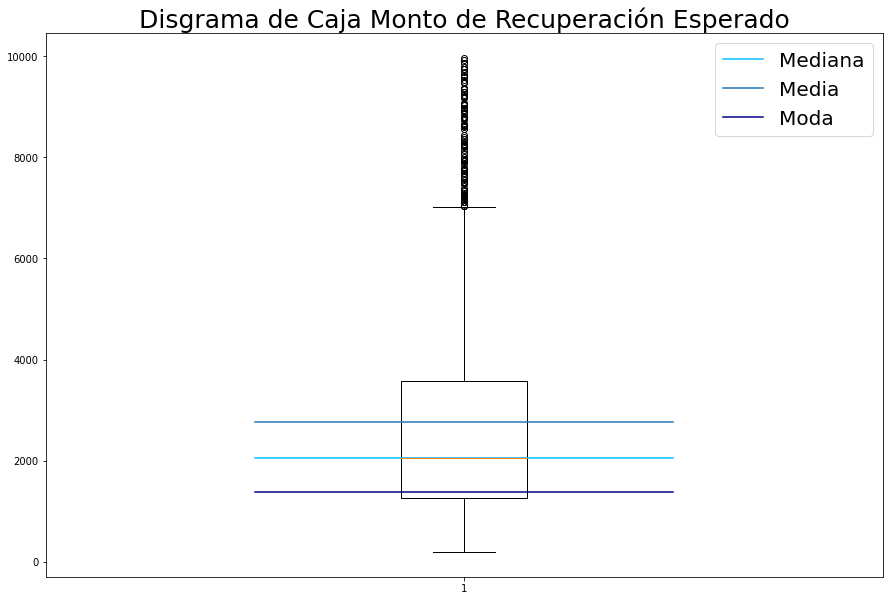

In [ ]:
fig = plt.figure(figsize =(15, 10)) 
plt.boxplot(Datos['monto_de_recuperacion_esperado'])

#Mediana(Azul clarito)
x_1=[0.75,1.25]
y_1=[2062,2062]
l1= plt.plot(x_1,y_1, color="deepskyblue", label="Mediana")

#Media(Azul detergente)
y_2=[2759.967588, 2759.967588]
x_2=[0.75,1.25]
l2= plt.plot(x_2,y_2, label="Media")

#Moda(Azul oscuro)
y_3=[1386, 1386]
x_3=[0.75,1.25]
plt.plot(x_3,y_3, color="navy", label="Moda")


plt.rc('legend',fontsize=20)
plt.legend( loc="upper right") 

plt.title("Disgrama de Caja Monto de Recuperación Esperado",fontsize=25)
plt.show() 

Esta gráfica no solo confirma la acumulación de individuos en los que espera el Banco devuelva el monto alrededor de 0 a 4000, tambien hace evidente que no prodremos descartar los puntos atipicos.

###5.1.2. Estadistica Descriptiva de la Variable Monto de Recuperacion Real:
Esta variable es de tipo `float64` o según nuestra clasificación estadistica es Cuantitativa Continua con lo cual pudimos obtener las Medidas Centrales, de Dispersion y de Posición de `XX.describe()`, además de aquellas, podemos tomar otras medidas de esos 3 tipos, empezando por la mas común aparte de la media y mediana:

In [ ]:
# Mediana (Medida de Tendencia Central)
mediana_MRR = median(Datos.monto_de_recuperacion_real)
print(mediana_MRR)

2115.4463725


In [ ]:
# Moda (Medida de Tendencia Central):
moda_MRR = sci.stats.mode(Datos.monto_de_recuperacion_real)
print(moda_MRR)

ModeResult(mode=array([200.425]), count=array([1]))


Otras Medidas de Tendencia Central:

In [ ]:
# Centro de Amplitud:
centroA_MRR = (max(Datos.monto_de_recuperacion_real)+min(Datos.monto_de_recuperacion_real))/2 
print(centroA_MRR)

17299.452355


Notese que no incluimos la *Media Ponderada* pues no poseemos informacion especifica sobre la importancia de cada cliente (Uno podria ser los **Niveles de la Estrategia de Recuperacion** pero en esta parte aun hablamos solo de *Variables Unidimensionales*). 

Tambien podremos tomar otras Medidas de Dispersion que nos den una idea de que tan representativos son los de Tendencia Central:  

In [ ]:
# Rango:
Rango_MRR = max(Datos.monto_de_recuperacion_real)-min(Datos.monto_de_recuperacion_real)
print(Rango_MRR)

34198.05471


Otras Medidas de Posición:

In [ ]:
# La Varianza:
Var_MRR = np.std(Datos.monto_de_recuperacion_real)**2
print(Var_MRR)

20933281.567631625


In [ ]:
# Coeficiente de Variacion:
# El coeficiente en este caso es extraño pues sobrepasa el 100%
CVar_MRR = np.std(Datos.monto_de_recuperacion_real)/np.mean(Datos.monto_de_recuperacion_real)*100
print(CVar_MRR,"%")

114.35458899641793 %


Despues de mostrar esta información estadistica, veamos como podemos representar los datos de esta variable graficamente.

La siguiente se trata de la Grafica de Densidad de la variable Monto de Recuperación Real:

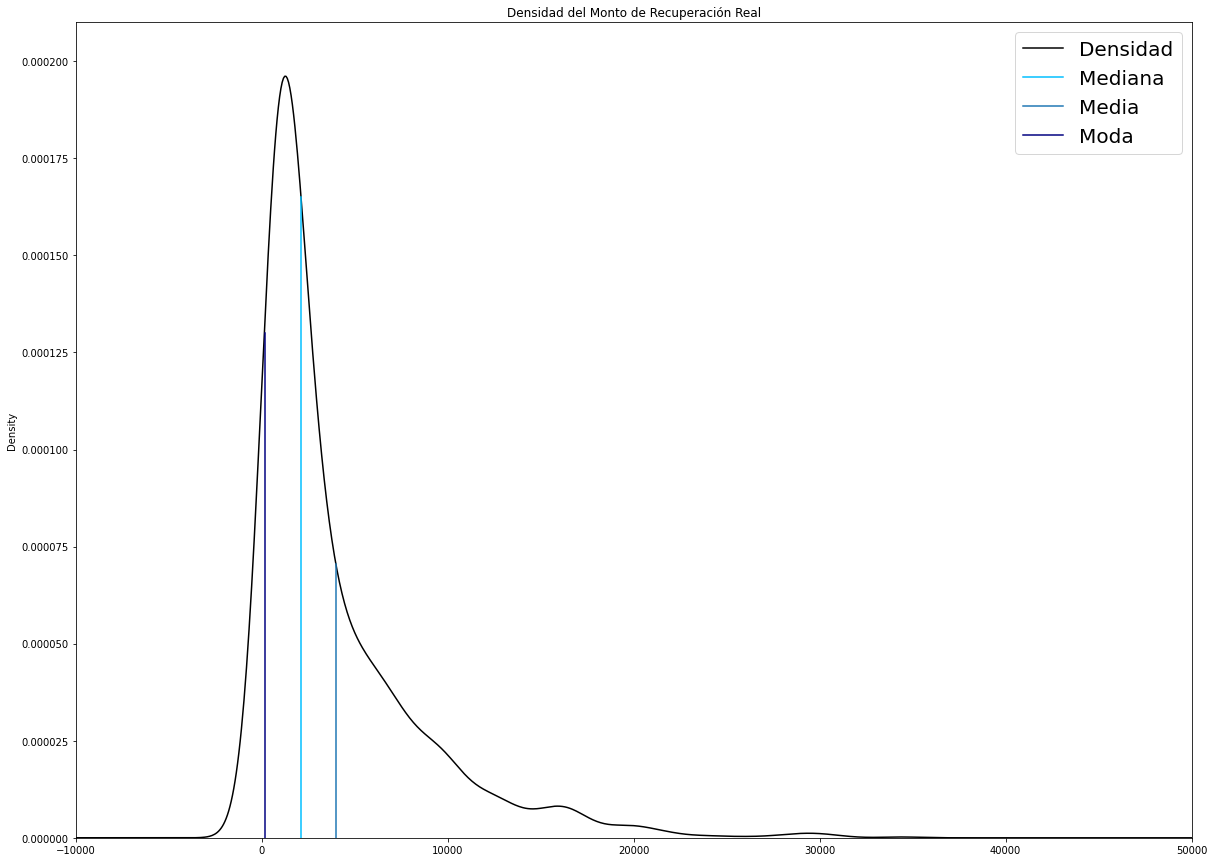

In [ ]:
Datos.monto_de_recuperacion_real.plot.density(color='black', figsize = (20,15)) 

#Mediana(Azul clarito)
x_1=[2115.4463725, 2115.4463725]
y_1=[0,0.000165]
l1= plt.plot(x_1,y_1, color="deepskyblue")

#Media(Azul detergente)
x_2=[4000.967837	, 4000.967837	]
y_2=[0,0.0000705]
l2= plt.plot(x_2,y_2)

#Moda(Azul oscuro)
x_3=[200.425, 200.42]
y_3=[0,0.000130]
plt.plot(x_3,y_3, color="navy") 

plt.xlim(-10000,50000)
plt.ylim(0,0.00021)

plt.rc('legend',fontsize=20)

plt.legend(["Densidad","Mediana","Media","Moda"],loc="upper right") 

plt.title("Densidad del Monto de Recuperación Real")
plt.show()

Prosiguiendo con el análisis podremos observar que la recuperación de dinero real se encuentra sobretodo en montos de entre 0 y 5000 Unidades Monetarias , o lo que es igual, al compararlo con el gráfico de Densidad del monto de recuperación esperado por el Banco, este posee un error en la prediccion de tendencia central de aproximadamente 1000 Unidades Monetarias, además claro la cola de la Densidad del monto real en este caso SI es despreciable.

Tambien podremos realizar el Gráfico de Caja para esta variable:

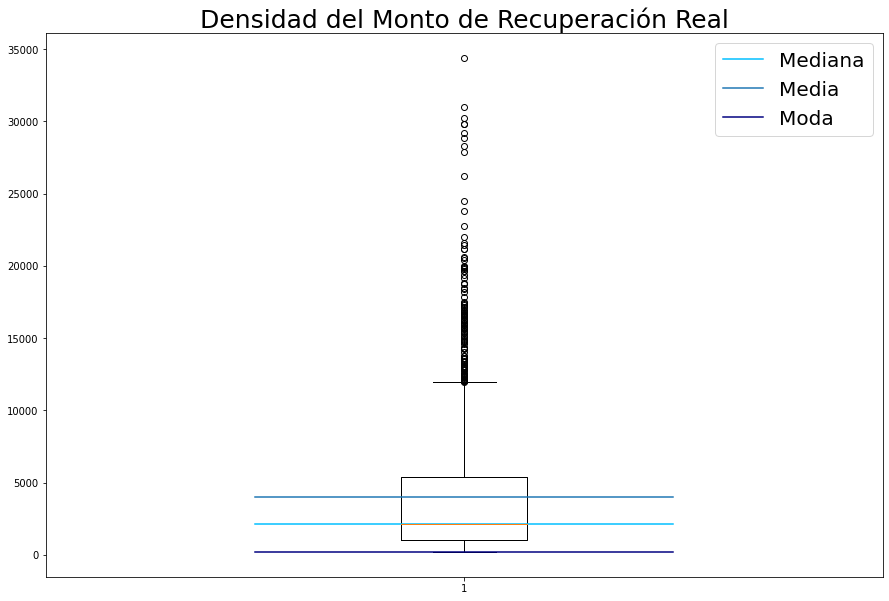

In [ ]:
fig = plt.figure(figsize =(15, 10)) 
plt.boxplot(Datos['monto_de_recuperacion_real'])

#Mediana(Azul clarito)

x_1=[0.75,1.25]
y_1=[2115.4463725,2115.4463725]
l1 = plt.plot(x_1,y_1, color="deepskyblue", label = "Mediana")

#Media(Azul detergente)

y_2=[4000.967837, 4000.967837]
x_2=[0.75,1.25]
l2 = plt.plot(x_2,y_2, label = "Media")

#Moda(Azul oscuro)

y_3=[200.425, 200.425]
x_3=[0.75,1.25]
plt.plot(x_3,y_3, color="navy", label = "Moda")


plt.rc('legend',fontsize=20)
plt.legend( loc="upper right") 

plt.title("Densidad del Monto de Recuperación Real",fontsize=25)
plt.show() 

Esta Gráfica puede ser engañosa, pues los extremos superior e inferior realmente no son realmente representativos de la Tendencia Central; cuyo intervalo es algo mayor, lo que a su vez explica la gran cantidad de Puntos Atipicos entre los 10000 y los 20000.

### Análisis de la gráfica

###5.1.3. Estadistica Descriptiva de la Variable Estrategia de Recuperacion:
Esta variable, según el comando `Datos.info()` es de tipo `object` esto significa que se trata de una cadena de simbolos alfa-numericos; es por ello que el comando `Datos.describe()` no nos provee informacion de la misma.

Por lo que debemos usar esta misma función especificamente para esta variable:

In [ ]:
Datos.estrategia_de_recuperacion.describe()

count                        1882
unique                          5
top       Nivel 1 de Recuperacion
freq                          670
Name: estrategia_de_recuperacion, dtype: object

La tabla de arriba nos provee de toda la información estadistica que podemos obtener de la variable **Estrategia de Recuperación** (Al menos por ahora pues solo tratamos con *Variables Unidimensionales*), asi que es importante revisar cuales son, de aquellos que no conocemos:


*   **unique:** Son la lista de categorias Cualitativas que se le pueden asignar a los datos de esta variable, en este caso son 5, las cuales se tratan de las 5 Estrategias de Recuperación (de 0 a 4) cuyas diferenciacion categorica ya se explico en la parte de *Datos del Proyecto*. 
*   **top:** La *Moda* (Medida de Tendencia Central), que por su definición tambien es aplicable a las Variables Cualitativas, en este caso se trata del *Nivel de Recuperación 1*.
*   **freq:** La cantidad de veces que se repite el dato que es la Moda, para esta variable este se repite 670 veces.

Otro dato estadistico que podemos tomar de esta variable son las *Proporciones* de cada categoria, y para calcularlos, nos serviremos de algunos algoritmos, como sigue:

Proporcion del Nivel 0 de las Estrategias de Recuperación:

In [ ]:
DataE=np.array(Datos.estrategia_de_recuperacion)
DataEst=DataE.transpose()
# Numero de Elementos del Nivel 0 de Estrategia de Recuperación
for index,k in enumerate(DataEst):
  if k=='Nivel 0 de Recuperacion':
    DataEst[index]=1
  else:
    DataEst[index]=0

Num_Nivel_0=0
for N0 in DataEst:
  Num_Nivel_0 += N0

print(Num_Nivel_0)

# Proporcion de elementos del Nivel 0 de Estrategia de Recuperación
Prop_Nivel_0 = Num_Nivel_0/len(Datos.estrategia_de_recuperacion)*100
print(Prop_Nivel_0,"%")

247
13.12433581296493 %


Proporción del Nivel 1 de las Estrategias de Recuperación:

In [ ]:
DataE=np.array(Datos.estrategia_de_recuperacion)
DataEst=DataE.transpose()

# Numero de Elementos del Nivel 1 de Estrategia de Recuperación
for index,k in enumerate(DataEst):
  if k=='Nivel 1 de Recuperacion':
    DataEst[index]=1
  else:
    DataEst[index]=0

Num_Nivel_1=0
for N1 in DataEst:
  Num_Nivel_1 += N1

print(Num_Nivel_1)

# Proporcion de elementos Nivel 1 en Estrategia de Recuperación
Prop_Nivel_1 = Num_Nivel_1/len(Datos.estrategia_de_recuperacion)*100
print(Prop_Nivel_1,"%")

670
35.60042507970245 %


Proporción del Nivel 2 de las Estrategias de Recuperación:

In [ ]:
DataE=np.array(Datos.estrategia_de_recuperacion)
DataEst=DataE.transpose()

# Numero de Elementos del Nivel 2 de Estrategia de Recuperación
for index,k in enumerate(DataEst):
  if k=='Nivel 2 de Recuperacion':
    DataEst[index]=1
  else:
    DataEst[index]=0

Num_Nivel_2=0
for N2 in DataEst:
  Num_Nivel_2 += N2

print(Num_Nivel_2)

# Proporcion de elementos Nivel 2 en Estrategia de Recuperación
Prop_Nivel_2 = Num_Nivel_2/len(Datos.estrategia_de_recuperacion)*100
print(Prop_Nivel_2,"%")

333
17.69394261424017 %


Proporción del Nivel 3 de las Estrategias de Recuperación:

In [ ]:
DataE=np.array(Datos.estrategia_de_recuperacion)
DataEst=DataE.transpose()

# Numero de Elementos del Nivel 3 de Estrategia de Recuperación
for index,k in enumerate(DataEst):
  if k=='Nivel 3 de Recuperacion':
    DataEst[index]=1
  else:
    DataEst[index]=0

Num_Nivel_3=0
for N3 in DataEst:
  Num_Nivel_3 += N3

print(Num_Nivel_3)

# Proporcion de elementos Nivel 2 en Estrategia de Recuperación
Prop_Nivel_3 = Num_Nivel_3/len(Datos.estrategia_de_recuperacion)*100
print(Prop_Nivel_3,"%")

368
19.55366631243358 %


Proporción de Nivel 4 de las Estrategias de Recuperación:

In [ ]:
DataE=np.array(Datos.estrategia_de_recuperacion)
DataEst=DataE.transpose()

# Numero de Elementos del Nivel 4 de Estrategia de Recuperación
for index,k in enumerate(DataEst):
  if k=='Nivel 4 de Recuperacion':
    DataEst[index]=1
  else:
    DataEst[index]=0

Num_Nivel_4=0
for N4 in DataEst:
  Num_Nivel_4 += N4

print(Num_Nivel_4)

# Proporcion de elementos Nivel 2 en Estrategia de Recuperación
Prop_Nivel_4 = Num_Nivel_4/len(Datos.estrategia_de_recuperacion)*100
print(Prop_Nivel_4,"%")

264
14.027630180658873 %


Ya con toda esta información estadistica, podemos pasar al análisis por medio de un Historigrama:

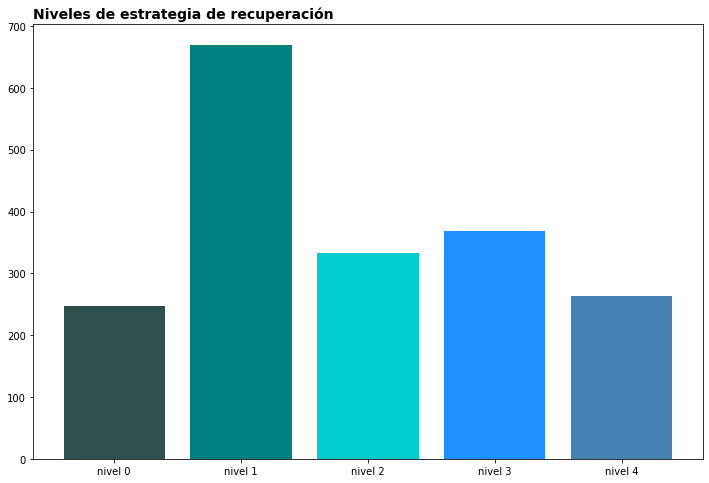

In [ ]:
colorB=['darkslategray','teal','darkturquoise', 'dodgerblue','steelblue']
fig, ax = plt.subplots(figsize =(12, 8))
ax.bar(['nivel 0','nivel 1', 'nivel 2', 'nivel 3', 'nivel 4'], [Num_Nivel_0,Num_Nivel_1,Num_Nivel_2,Num_Nivel_3,Num_Nivel_4],color=colorB)
ax.set_title('Niveles de estrategia de recuperación',loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()

De donde se ve que el Banco espera que se recuperen montos, principamente de entre 1000 y 2000 Unidades Monetarias.

###5.1.4. Estadistica Descriptiva de la Variable Edad:
Como podemos observar mas arriba gracias al comando `XX.info()` esta variable es de tipo `int64` con lo cual entra en la categoria de Variable Cuantitativa Discreta y podremos, no solo, obtener la información de `XX.describe()` sino tambien otro tipo de Medidas Estadisticas: 

In [ ]:
# Moda (Medida de Tendencia Central):
moda_E = sci.stats.mode(Datos.edad)
print(moda_E)

ModeResult(mode=array([33]), count=array([82]))


Otras Medidas de Tendencia Central:

In [ ]:
# Centro de Amplitud:
centroA_E = (max(Datos.edad)+min(Datos.edad))/2 
print(centroA_E)

51.0


Notese que no incluimos la *Media Ponderada* pues no poseemos informacion especifica sobre la importancia de cada cliente (Uno podria ser los **Niveles de la Estrategia de Recuperacion** pero en esta parte aun hablamos solo de *Variables Unidimensionales*). 

Tambien podremos tomar otras Medidas de Dispersion que nos den una idea de que tan representativos son los de Tendencia Central:  

In [ ]:
# Rango:
Rango_E = max(Datos.edad)-min(Datos.edad)
print(Rango_E)

66


Otras Medidas de Posición:

In [ ]:
# La Varianza:
Var_E = np.std(Datos.edad)**2
print(Var_E)

238.6705338680333


In [ ]:
# Coeficiente de Variacion:
CVar_E = np.std(Datos.edad)/np.mean(Datos.edad)*100
print(CVar_E,"%")

38.96297740722824 %


Despues de mostrar esta información estadistica, veamos como podemos representar los datos de esta variable atravez de una gráfica de violin, que sintetiza la información del gráfico de caja y del de densidad:

### Clasificación de edad
Para corroborar la información, podemos generar un diagrama de barras que muestre de manera clara lo afirmado anteriormente. primero clasificamos las edades por rangos:  

In [ ]:
np_edad=np.array(Datos.edad)
EdadT=np_edad.transpose()

for index,k in enumerate(EdadT):
  if 11<=k<=20:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad11_20=0
for M in EdadT:
  Edad11_20 += M

print(Edad11_20)

108


In [ ]:
np_edad2=np.array(Datos.edad)
EdadT2=np_edad2.transpose()

for index,k in enumerate(EdadT2):
  if 21<=k<=30:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad21_30=0
for M in EdadT:
  Edad21_30 += M


print(Edad21_30)

520


In [ ]:
np_edad3=np.array(Datos.edad)
EdadT3=np_edad3.transpose()

for index,k in enumerate(EdadT3):
  if 31<=k<=40:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad31_40=0
for M in EdadT:
  Edad31_40 += M


print(Edad31_40)

523


In [ ]:
np_edad4=np.array(Datos.edad)
EdadT4=np_edad4.transpose()

for index,k in enumerate(EdadT4):
  if 41<=k<=50:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad41_50=0
for M in EdadT:
  Edad41_50 += M


print(Edad41_50)

276


In [ ]:
np_edad5=np.array(Datos.edad)
EdadT5=np_edad5.transpose()

for index,k in enumerate(EdadT5):
  if 51<=k<=60:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad51_60=0
for M in EdadT:
  Edad51_60 += M


print(Edad51_60)

226


In [ ]:
np_edad6=np.array(Datos.edad)
EdadT6=np_edad6.transpose()

for index,k in enumerate(EdadT6):
  if 61<=k<=70:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad61_70=0
for M in EdadT:
  Edad61_70 += M


print(Edad61_70)

133


In [ ]:
np_edad7=np.array(Datos.edad)
EdadT7=np_edad7.transpose()

for index,k in enumerate(EdadT7):
  if 71<=k<=80:
    np_edad[index]=1
  else:
    np_edad[index]=0

Edad71_80=0
for M in EdadT:
  Edad71_80 += M


print(Edad71_80)

75


### - Diagrama de barras 

Se puede ver en la gráfica que efectivamente la mayoría de deudores se encuentran entre los 21 y 40 años.

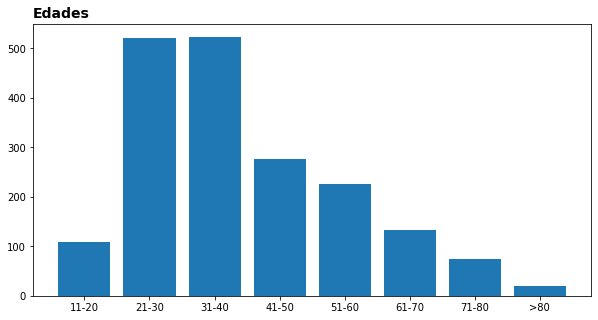

In [ ]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.bar(['11-20','21-30', '31-40', '41-50', '51-60','61-70','71-80','>80'], [Edad11_20,Edad21_30,Edad31_40,Edad41_50,Edad51_60,Edad61_70,Edad71_80,1881-(Edad11_20+Edad21_30+Edad31_40+Edad41_50+Edad51_60+Edad61_70+Edad71_80)])
ax.set_title('Edades',loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()



De esta gráfica se pueden observar varias cosas, entre ellas, que la tendencia es que los deudores tienden a decrecer con respecto a la Edad, apartir de los 30 años y a crecer de los 18 a los 30 años; tambien, la mayoria de deudores se encuentran entre los 20 y 40 años, aunque no se pueden descartar las Edades fuera de este rango. 

###5.1.5. Estadistica Descriptiva de la Variable Sexo:
Esta variable, según el comando `Datos.info()` es de tipo `object` esto significa que se trata de una cadena de simbolos alfa-numericos; es por ello que el comando `Datos.describe()` no nos provee informacion de la misma.

Por lo que debemos usar esta misma función especificamente para esta variable:

In [ ]:
Datos.sexo.describe()

count          1882
unique            2
top       Masculino
freq            973
Name: sexo, dtype: object

La tabla de arriba nos provee de toda la información estadistica que podemos obtener de la variable **Sexo** (Al menos por ahora pues solo tratamos con *Variables Unidimensionales*), asi que es importante revisar cuales son, aquellos que no conocemos:


*   **unique:** Son la lista de categorias Cualitativas que se le pueden asignar a los datos de esta variable, en este caso 2, Masculino y Femenino. 
*   **top:** La *Moda* (Medida de Tendencia Central), que por su definición tambien es aplicable a las Variables Cualitativas, en este caso es la categoria Masculino.
*   **freq:** La cantidad de veces que se repite la Moda, para esta variable es 973 veces.


Otro dato estadistico que podemos tomar de esta variable son las *Proporciones* de cada categoria, y para calcularlos, nos serviremos de algunos algoritmos, como sigue:

In [ ]:
DataS=np.array(Datos.sexo)
DataSex=DataS.transpose()

# Numero de Elementos de Categoria Masculino en Sexo
for index,k in enumerate(DataSex):
  if k=='Masculino':
    DataSex[index]=1
  else:
    DataSex[index]=0

Num_Masculino=0
for M in DataSex:
  Num_Masculino += M

print(Num_Masculino)

# Proporcion de elementos Masculino en Sexo
Prop_Sex_Masculino = Num_Masculino/len(Datos.sexo)*100
print(Prop_Sex_Masculino,"%")

973
51.70031880977683 %


Y las Proporciones de "*Femenino*" con respecto a la Variable serán:

In [ ]:
DataS=np.array(Datos.sexo)
DataSex=DataS.transpose()

# Numero de Elementos de Categoria Femenino en Sexo
for index,k in enumerate(DataSex):
  if k=='Femenino':
    DataSex[index]=1
  else:
    DataSex[index]=0

Num_Femenino=0
for F in DataSex:
  Num_Femenino += F

print(Num_Femenino)

#Proporción de Femenino en Sexo
Prop_Sex_Femenino = Num_Femenino/len(Datos.sexo)*100
print(Prop_Sex_Femenino,"%")

909
48.29968119022317 %


Podremos realizar una Grafica de Pastel de la Variable Sexo, en este caso se compara de entre la cantidad de mujeres y el de hombres.
 La variable *Sexo* no es interpretada por **NumPy** como una *Numerica* (mas especificamente del tipo `object`), por lo que debemos manipular los datos para cambiar su tipo:



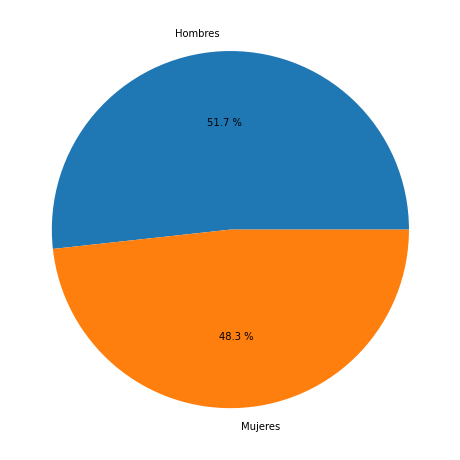

In [ ]:
fig, ax = plt.subplots(figsize =(8, 10))
Gender=['Hombres','Mujeres']
Num_Gender=[Num_Masculino,1881-Num_Masculino]
plt.pie(Num_Gender, labels=Gender, autopct="%0.1f %%")
plt.show()

Y de donde se puede decir que la mayoria de deudores son hombres, aunque la diferencia no es significativa.

##5.2 Análisis de dos variables 
podemos crear una gráfica de comparación pairplot de la edad (clasificando en dos grupos) con los montos de recuperación esperados y el monto de recuperación real, y ver que tipo e clientes realmente cumplen con el pago.

*gráficos de dispersión*



Para realizar el analisis gráfico comparando las variables que tenemos 2 a 2, necesitaremos expresar a las variables *sexo* y *Estrategia de Recuperación* como variables numericas:

In [ ]:
find = ['Masculino', 'Femenino','Nivel 0 de Recuperacion','Nivel 1 de Recuperacion', 'Nivel 2 de Recuperacion','Nivel 3 de Recuperacion', 'Nivel 4 de Recuperacion']
replace = [0,1,0,1,2,3,4]
Datos_Numerico = Datos.replace(find, replace)
Datos_Numerico.head()

,id,monto_de_recuperacion_esperado,monto_de_recuperacion_real,estrategia_de_recuperacion,edad,sexo
0,2030,194,263.540,0,19,0
1,1150,486,416.090,0,25,1
2,380,527,429.350,0,27,0
3,1838,536,296.990,0,25,0
4,1995,541,346.385,0,34,0


###5.2.? Correlación de Todas las Variables:


###5.2.9 Gráficas Múltiples de Correlación 2 a 2:
Con todo el estudio ya realizado en la relación de cada 2 variables podremos sintetizar toda esta información atraves de una *Matriz de Correlacion*: 

In [ ]:
corr_matrix = Datos_Numerico.iloc[:,1:7].corr()
corr_matrix

,monto_de_recuperacion_esperado,monto_de_recuperacion_real,estrategia_de_recuperacion,edad,sexo
monto_de_recuperacion_esperado,1.000000,0.903727,0.906582,0.794451,0.021485
monto_de_recuperacion_real,0.903727,1.000000,0.801913,0.716007,0.033324
estrategia_de_recuperacion,0.906582,0.801913,1.000000,0.801555,0.034651
edad,0.794451,0.716007,0.801555,1.000000,-0.016876
sexo,0.021485,0.033324,0.034651,-0.016876,1.000000


Aunque esta matriz nos provee de información útil, podremos mostrar la correlación entre variables de manera mas sintactica atravez de su respectiva *Gráfica de Panal*:

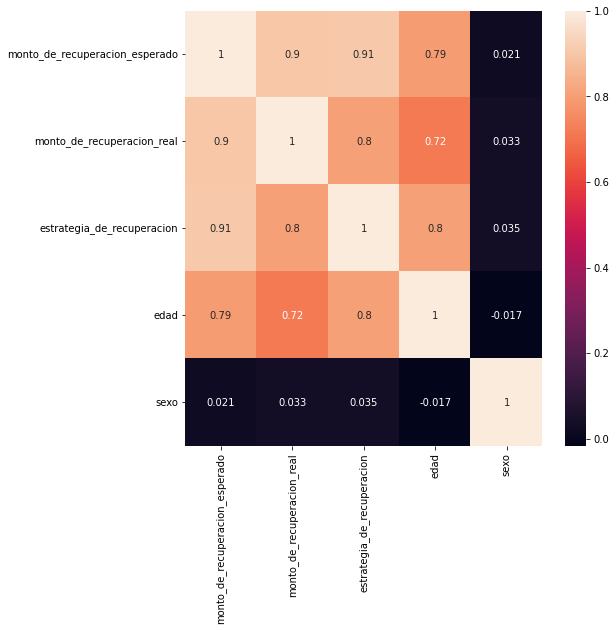

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

plt.show()

**Monto de Recuperación Esperado - Estrategia de Recuperación:** La alta correlacion entre las dos es evidente pues una es la clasificación creada para el otro.

**Monto de Recuperación Real - Estrategia de Recuperación:** Como se puede observar el coeficiente de correlacion entre estas 2 variables es del 80%, menor al 90% de correlacion entre el Nivel de Recuperación y el Monto supuesto por el Banco; sin embargo, esto indica una alta precision en cuanto a la asignación de estrategias por parte del Banco, sin embargo,  desconocemos si este nivel es aceptable.


**Sexo**: Como es de esperar, el sexo no tiene correlación con ninguna de las tres variables ya que una persona puede estar endeudada en mayor o menor medida independientemente del sexo que tenga.

**Edad-Nivel de estrategia de recuperación**: La alta correlación se debe a que mientras mayor sea una persona, esta tiene más capacidad de pagar una deuda, por tanto la estrategia de recuperación aplicada por el banco será mayor.



Además podremos realizar un cuadro completo de las diferentes *Gráficas de Dispersion* entre cada 2 variables como sigue:

<Figure size 720x1080 with 0 Axes>

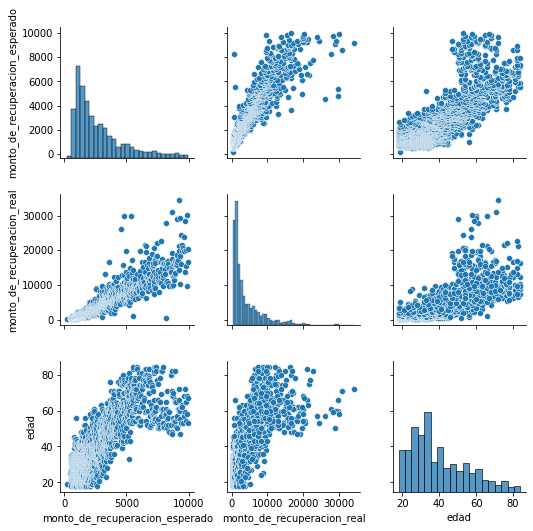

In [ ]:
plt.figure(figsize=(10,15))
sns.pairplot(data=Datos_Numerico,vars=['monto_de_recuperacion_esperado', 'monto_de_recuperacion_real', 'edad'], hue=None)
plt.show()

**Inserte observaciones apartir de la gráfica**

*  **Monto de recuperación esperado - Monto de recuperación real:**
Al relacionar estas variables podemos evidenciar en la gráfica que entre más alto sea el monto de recuperación esperado más alto será el monto de recuperación real, ya que, es claro que entre más se le deba al banco más altas serán las cuotas. 
*  **Monto de recuperación esperado - Edad:** 
Al relacionar estas variables podemos deducir que el monto de recuperación esperado más alto se encuentra entre la edad de 50 a 80 años, lo cual es entendible ya que personas entre esa edad se relacionan a una mejor estabilidad económica y, por lo tanto, se espera recuperar una mayor cantidad de dinero de estas.
*  **Monto de recuperación real - Edad:**
Teniendo en cuenta lo anterior, al tener una mejor estabilidad económica las personas que están entre la edad de 50 a 80 años, entonces estas pueden pagar al banco una mayor cantidad y, por lo tanto, el dinero recuperado de estas es mayor.
 


##6. Modelo de Regresion: Monto de Recuperacion Esperado-Monto de Recuperacion Real:
Ahora, buscamos predecir el comportamiento del Monto de Recuperación Real a partir del Monto de Recuperación Esperado, para esto nos apoyamos en un modelo de regresión lineal: 

###6.1. Sobre el Modelo:

En este primer modelo de regrecion lineal, tomaremos el Monto de Recuperacion Esperado como nuestra Variable Independiente y al Monto de  Recuperacion Real lo designaremos como la Variable Dependiente (Esto es posible debido a la alta correlación que existe entre estos dos).

Para ello utilizaremos el primer valor del umbral dado de 1000$, ahora, tomaremos un intervalo alrededor de este umbral, el intervalo será (900,1100), no es necesario tomar intervalos más grandes ya que lo que nos interesa es la distribución de los datos cerca del umbral.



In [ ]:
#Asignemos un Nombre al intervalo
intervalo_900_1100 = Datos.loc[(Datos['monto_de_recuperacion_esperado']<1100) & (Datos['monto_de_recuperacion_esperado']>=900)]

print(intervalo_900_1100)

       id  monto_de_recuperacion_esperado  monto_de_recuperacion_real  \
158   520                             900                  504.790000   
159  1036                             900                  539.535000   
160  1383                             900                  554.745000   
161   998                             901                  887.005000   
162  1351                             903                  667.035000   
..    ...                             ...                         ...   
336  1184                            1096                 1077.218384   
337  1664                            1096                 2053.290126   
338   302                            1098                  876.997775   
339   554                            1098                 1836.918718   
340  1501                            1099                 1277.630578   

    estrategia_de_recuperacion  edad       sexo  
158    Nivel 0 de Recuperacion    34  Masculino  
159    Nivel 0 de Recup

Ahora calcularemos el monto de recuperación real promedio para aquellos clientes justo por debajo y por encima del umbral utilizando un rango de 900 a 1100. Luego, realizaremos una prueba de Kruskal-Wallis para ver si las cantidades de recuperación reales son diferentes justo por encima y por debajo del umbral.

In [ ]:
Nivel_0_actual = intervalo_900_1100.loc[Datos['estrategia_de_recuperacion']=='Nivel 0 de Recuperacion']['monto_de_recuperacion_real']
Nivel_1_actual = intervalo_900_1100.loc[Datos['estrategia_de_recuperacion']=='Nivel 1 de Recuperacion']['monto_de_recuperacion_real']
stats.kruskal(Nivel_0_actual,Nivel_1_actual) 

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)

Hay que tener en cuenta que el método de Kruskal-Wallis se utiliza para corroborar si existen diferencias relevantes a nivel estadístico entre dos o más grupos de una variable independiente en una variable dependiente.

La prueba determina si las madianas de dos o más grupos son diferentes. De esta forma calcula un estadístico de prueba y lo compara con un punto de corte de la distribución.

El P-valor es la probabilidad que mide la evidencia en contra de la hipótesis nula. Las probabilidades más bajas proporcionan una evidencia más fuerte en contra de la hipótesis nula. Con lo que en este caso se rechaza la hipótesis nula y se concluye que no todas las medianas son iguales, con lo que es conveniente realizar una regresión lineal. 

###6.1.1. Regresión lineal:
Ahora queremos adoptar un enfoque basado en la regresión lineal para estimar el impacto del programa en el umbral de $1000 utilizando datos que están justo por encima y por debajo del umbral.


En este modelo, no estamos representando el umbral sino simplemente viendo cómo la variable utilizada para asignar los clientes (monto de recuperación esperado) se relaciona con la variable de resultado (monto de recuperación real).

Buscamos observar si el dinero extra invertido en asignar una Estrategia de Recuperación alta es rentable para el banco. 



In [ ]:
#Asignemos las Variables:
x = intervalo_900_1100['monto_de_recuperacion_esperado']
y = intervalo_900_1100['monto_de_recuperacion_real']

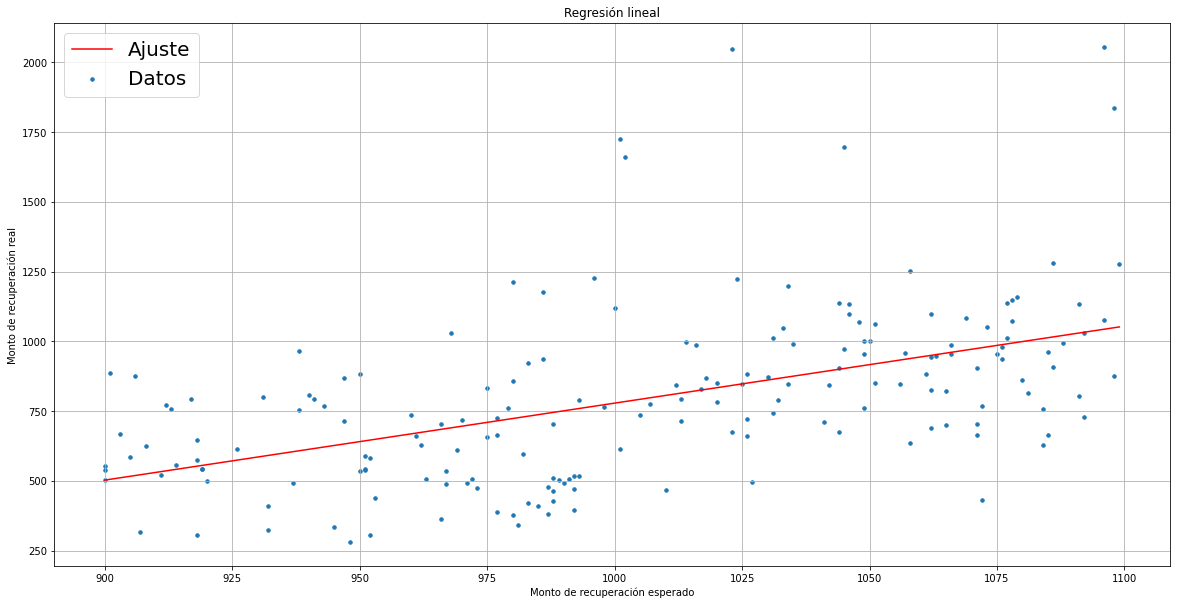

In [ ]:
n = len(x)
z = np.array(x)
w = np.array(y)
sumx = sum(z)
sumy = sum(w)
sumx2 = sum(z**2)
sumy2 = sum(w**2)
sumxy = sum(z*w)
promx = sumx/n
promy = sumy/n
m = (sumx*sumy-n*sumxy)/(sumx*sumx-n*sumx2)
b = promy-m*promx
plt.figure(figsize =(20, 10))
plt.scatter(z,w, label="Datos", s=12)
plt.plot(z,m*z+b, label="Ajuste", color="red")
plt.xlabel("Monto de recuperación esperado")
plt.ylabel("Monto de recuperación real")
plt.title("Regresión lineal")
plt.grid()
plt.legend()
plt.show()

Ahora, necesitamos el coeficiente de determinación para saber que tan buen ajuste fue el que acabamos de hacer.

In [ ]:
varix = np.sqrt(sumx2/n - promx*promx)
variy = np.sqrt(sumy2/n - promy*promy)
covarixy = sumxy/n - promx*promy
R2 = (covarixy/(varix*variy))**2
print(R2)

0.2605541661465666


Dicho coeficiente nos muestra que el ajuste no es tan bueno, sin embargo es el mejor que se puede realizar. 

Ahora procederemos a verificar que el modelo que realizamos mediante métodos matemáticos coincide con el generado por el comando
```
sm.OLS(y,x).fit()
```



In [ ]:

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
predicciones = modelo.predict(x)


modelo.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     monto_de_recuperacion_real   R-squared:                       0.261
Model:                                    OLS   Adj. R-squared:                  0.256
Method:                         Least Squares   F-statistic:                     63.78
Date:                        Tue, 06 Dec 2022   Prob (F-statistic):           1.56e-13
Time:                                21:23:10   Log-Likelihood:                -1278.9
No. Observations:                         183   AIC:                             2562.
Df Residuals:                             181   BIC:                             2568.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
monto_de_recuperacion_esperado     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En esta tabla podemos ver algunos de los valores que usamos para construir el ajuste tales como el Coeficiente de la Constante (que coincide con el valor del intercepto de la recta con el eje y) y el Coeficiente de Monto de Recuperación Esperado (que coincide con la pendiente de la recta).

Además podemos observar que el coeficiente de determinación hallado matemáticamente coincide con el valor de R-cuadrado mostrado en la tabla.

###6.2 Conclusiones.

Finalmente, a partir de la regresión lineal podremos decir, interpretando el valor que obtuvimos de la pendiente siendo este aproximadamente 2.76, estadísticamente significativo, lo cual quiere decir que por cada UM que se aumente en el Monto de Recuperación Esperado el Monto de Recuperacion Real aumentará en 2.76 UM.

Teniendo en cuenta el intervalo tomado (de 900 a 1100) junto con el umbral (de 1000) en donde se aplica una estrategia de recuperación, entonces las 100 UM que se aumentan en el Monto de Recuperación Esperado (de 900 a 1000) hasta llegar al umbral, se aumentará en 276 UM en el Monto de Recuperación Real.

Además se sabe que el aplicar una Estrategia de Recuperación alta requiere una inversión de 50 UM por lo que aplicar una Estrategia de Recuperación alta a un a un cliente con mayor deuda es rentable para el banco, ya que recuperará alrededor 276 UM.